In [1]:
import fun as f
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import networkx as nx
import scipy.linalg as la
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.neighbors import kneighbors_graph
from IPython.display import Image
from mpl_toolkits.mplot3d import Axes3D

# 1- Half-moon Dataset:

In [2]:
#Generate data
Npts = 35
half_moons_data = datasets.make_moons(n_samples=Npts, noise=.040, random_state=1991)
nodes_position = dict()
for key  in [i for i in range(Npts)]:
    nodes_position[key] = list(half_moons_data[0][key])

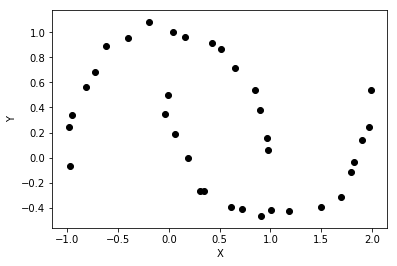

In [3]:
#plot data
f.scatter_plot_data_set(half_moons_data[0], half_moons_data[1], "figures/01-two_half_moons", False)

## i) Fully connected graph 

In [4]:
small_sigma = 0.05
W_half_moon = f.adjacency_matrix(half_moons_data[0], sigma=small_sigma)

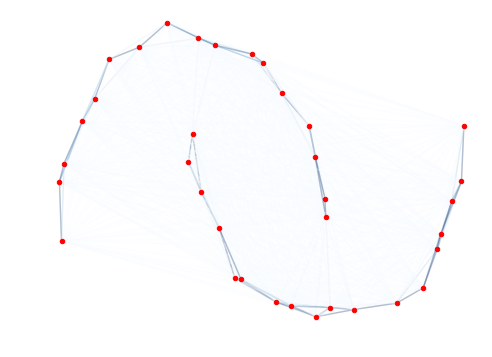

In [6]:
#create graph
hm = f.create_weighted_Graph(W_half_moon)
#Plot graph
f.plot_Graph(hm, nodes_position, title = '',alpha=0.3, output_file_name="fully_connected_graph")

In [7]:
#Unnormalized
Image(url='gif.gif')

In [8]:
#Unnormalized graph Laplacian
eigenvalues_unnorm_m, eigenvectors_unnorm_m = la.eig(f.unnormalized_graph_Laplacian(W_half_moon))
eigenvalues_unnorm_m = eigenvalues_unnorm_m.real
rearranged_unnorm_evals_moon_data = f.rearrange_eigenvals(eigenvalues_unnorm_m, eigenvectors_unnorm_m)
rearranged_unnorm_vecs_moon_data = f.rearrange_eigenvecs(rearranged_unnorm_evals_moon_data,
                                                      half_moons_data[1])

#Symmetric graph Laplacian
eigenvalues_sym_m, eigenvectors_sym_m = la.eig(f.normalized_graph_Laplacian(W_half_moon,matrix ="symmetric"))
eigenvalues_sym_m = eigenvalues_sym_m.real
rearranged_sym_evals_moon_data = f.rearrange_eigenvals(eigenvalues_sym_m, eigenvectors_sym_m)
rearranged_sym_vecs_moon_data = f.rearrange_eigenvecs(rearranged_sym_evals_moon_data,
                                                       half_moons_data[1])

##Random Walk graph Laplacian   
eigenvalues_rw_m, eigenvectors_rw_m = la.eig(f.normalized_graph_Laplacian(W_half_moon, matrix ="rw"))
eigenvalues_rw_m = eigenvalues_rw_m.real
rearranged_rw_evals_moon_data = f.rearrange_eigenvals(eigenvalues_rw_m, eigenvectors_rw_m)
rearranged_rw_vecs_moon_data = f.rearrange_eigenvecs(rearranged_rw_evals_moon_data,
                                                       half_moons_data[1])



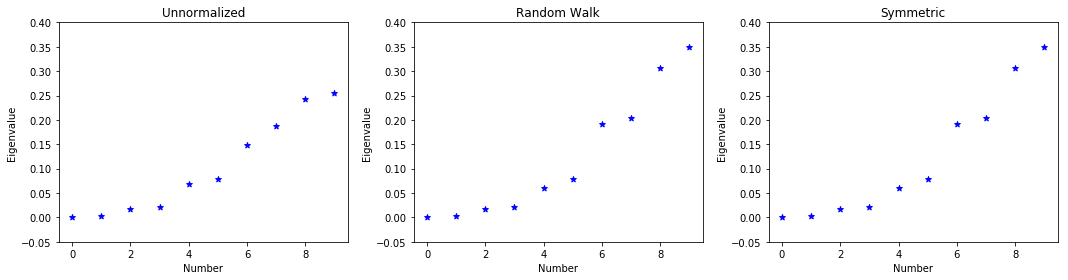

In [9]:
titles_list = ["Unnormalized","Random Walk","Symmetric"]
ylim_list =[(-0.05, 0.4), (-0.05, 0.4), (-0.05, 0.4), (-0.05, 0.4)]
eigenvalues_sorted_lists = f.eigenvalues_list([rearranged_unnorm_evals_moon_data,
                                               rearranged_rw_evals_moon_data,
                                               rearranged_sym_evals_moon_data])
f.plot_eigenvalues(eigenvalues_sorted_lists, titles_list,
                   ylim_list, "figures/11-eigenvalues_halfmoons",n=10)

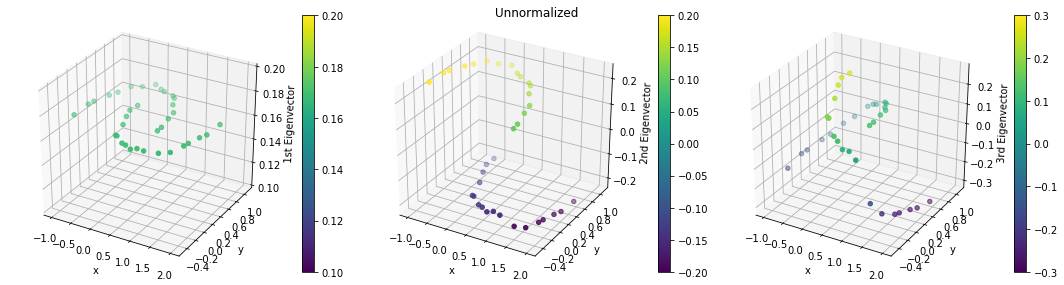

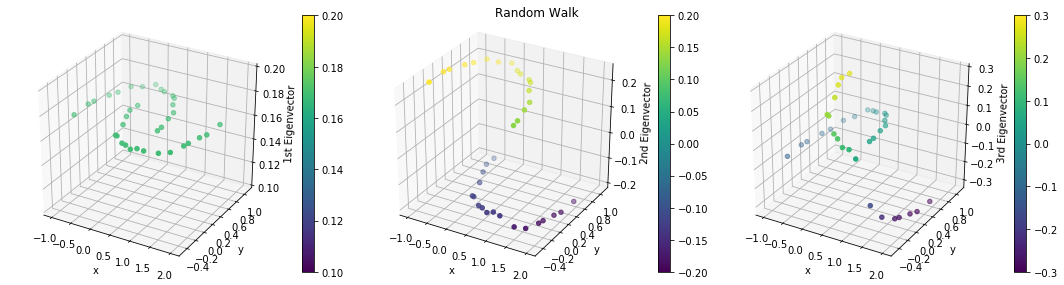

In [10]:
x, y = half_moons_data[0].T
f.plot3D_eigenvectors(x,y,3,[rearranged_unnorm_evals_moon_data, rearranged_rw_evals_moon_data] ,
                      [[(0.1,0.2),(-0.2,0.2),(-0.3,0.3)],[(0.1,0.2),(-0.2,0.2),(-0.3,0.3)]],
                      "figures/11-3Deigenvecs_moon")

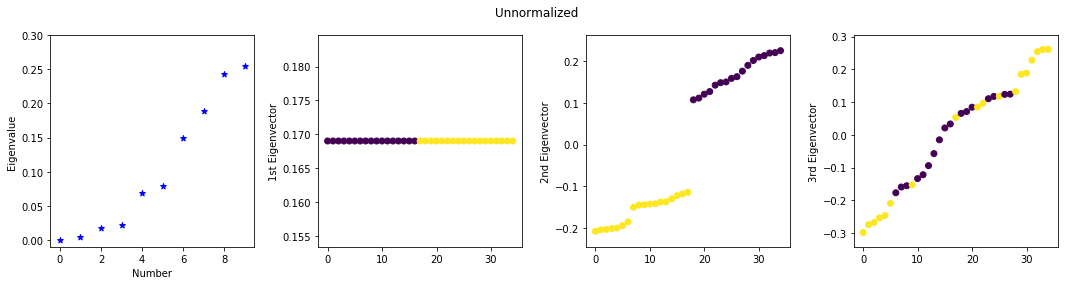

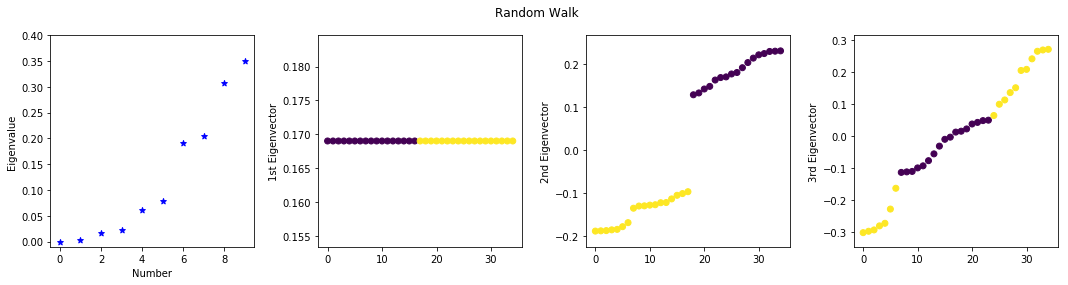

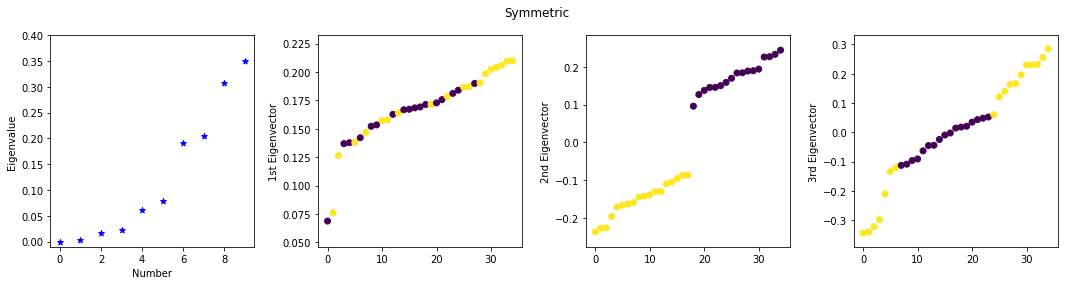

In [11]:
rearranged_evals_list= [rearranged_unnorm_evals_moon_data, 
                        rearranged_rw_evals_moon_data,
                        rearranged_sym_evals_moon_data]
f.plot_eigenvects(rearranged_evals_list, 3, half_moons_data[1],
                  [(-0.01,0.3),(-0.01,0.4),(-0.01,0.4)],
                 "figures/11-eigenvecs_moon")

## The algorithms

In [12]:
#K-means performance before the change of representation of the data:
kmeans_moon_data_coord = KMeans(n_clusters=2,random_state=0).fit(half_moons_data[0])

#K-means performance after performing spectral clustering:
c_unnormalized = f.spectral_clustering_algorithm(rearranged_unnorm_evals_moon_data, 2, which="unnormalized")
c_rw = f.spectral_clustering_algorithm(rearranged_rw_evals_moon_data, 2, which="normalized_rw")
c_sym = f.spectral_clustering_algorithm(rearranged_sym_evals_moon_data, 2, which="normalized_sym")

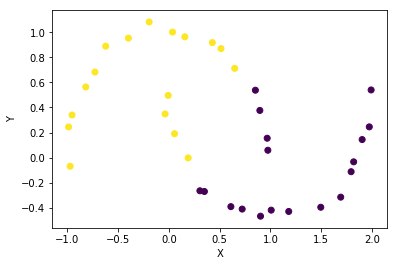

In [13]:
x, y = half_moons_data[0].T
plt.scatter(x,y,c=kmeans_moon_data_coord.labels_)
plt.xlabel("X")
plt.ylabel("Y")
plt.savefig("figures/13-kmeans_moon_data")
plt.show()

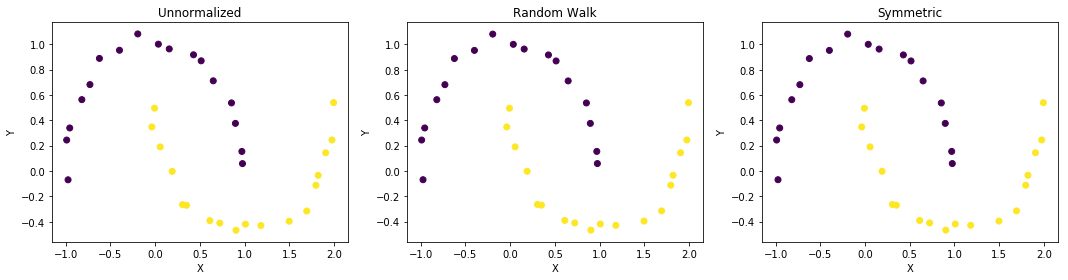

In [14]:
titles_list = ["Unnormalized","Random Walk","Symmetric"]
f.plot_kmeans_clustering(x,y,titles_list,[c_unnormalized, c_rw, c_sym],"figures/14-sc_moon_data")

## Sensitivity to parameter selection

In [15]:
large_sigma = 0.1
W_half_moon_large_sigma = f.adjacency_matrix(half_moons_data[0], sigma=large_sigma)
#Unnormalized graph Laplacian
eigenvalues_unnorm_ls, eigenvectors_unnorm_ls = la.eig(f.unnormalized_graph_Laplacian(W_half_moon_large_sigma))
eigenvalues_unnorm_ls = eigenvalues_unnorm_ls.real
rearranged_unnorm_evals_ls = f.rearrange_eigenvals(eigenvalues_unnorm_ls, eigenvectors_unnorm_ls)
#Symmetric graph Laplacian
eigenvalues_sym_ls, eigenvectors_sym_ls = la.eig(f.normalized_graph_Laplacian(W_half_moon_large_sigma,
                                                                              matrix ="symmetric"))
eigenvalues_sym_ls = eigenvalues_sym_ls.real
rearranged_sym_evals_ls = f.rearrange_eigenvals(eigenvalues_sym_ls, eigenvectors_sym_ls)
##Random Walk graph Laplacian   
eigenvalues_rw_ls, eigenvectors_rw_ls = la.eig(f.normalized_graph_Laplacian(W_half_moon_large_sigma,
                                                                            matrix ="rw"))
eigenvalues_rw_ls = eigenvalues_rw_ls.real
rearranged_rw_evals_ls = f.rearrange_eigenvals(eigenvalues_rw_ls, eigenvectors_rw_ls)

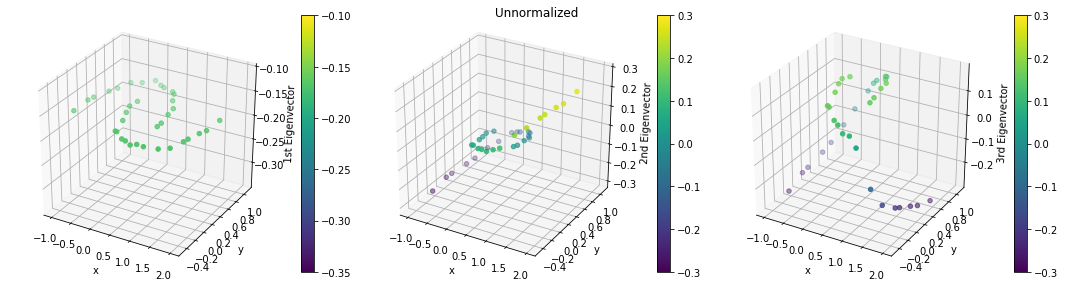

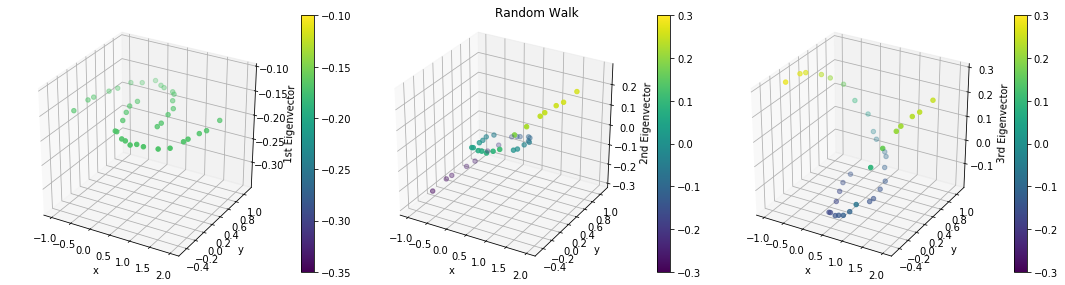

In [16]:
f.plot3D_eigenvectors(x,y,3,[rearranged_unnorm_evals_ls, rearranged_rw_evals_ls] ,
                      [[(-0.35, -0.1),(-0.3,0.3),(-0.3,0.3)],
                      [(-0.35, -0.1), (-0.3,0.3),(-0.3,0.3)]],
                     "figures/15-3Deigenvecs_moon_ls")

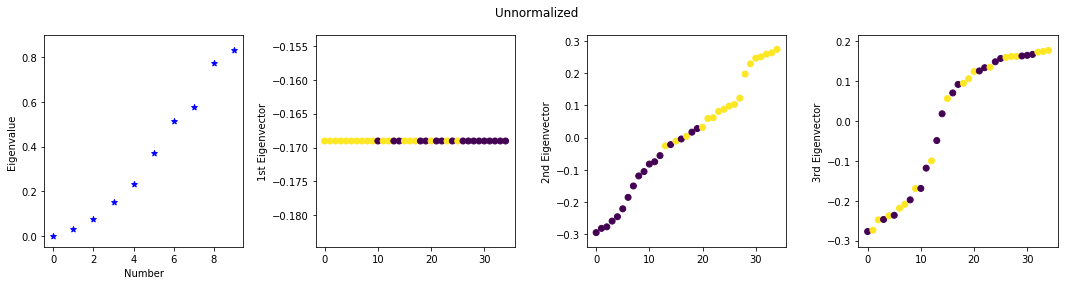

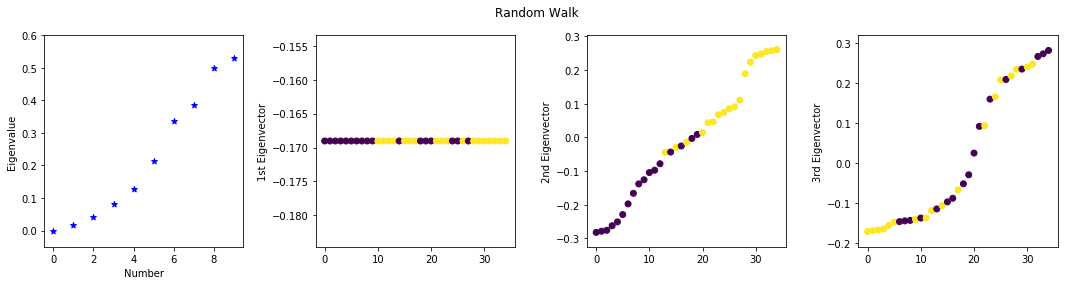

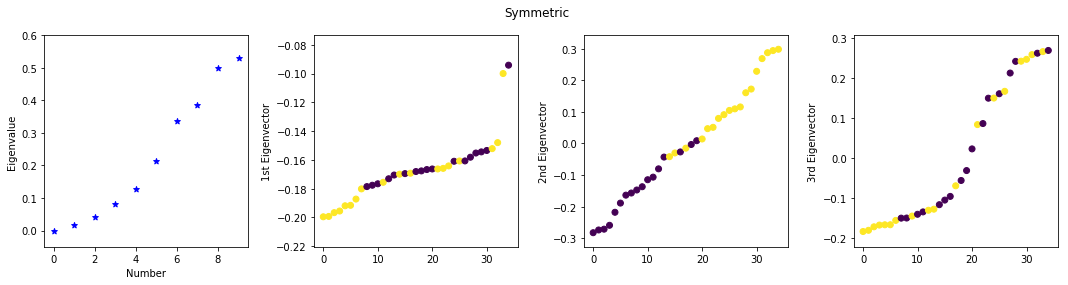

In [17]:
f.plot_eigenvects([rearranged_unnorm_evals_ls,
                 rearranged_rw_evals_ls,
                 rearranged_sym_evals_ls], 3,
                  half_moons_data[1],[(-0.05, 0.9),(-0.05, 0.6),(-0.05, 0.6)],
                  "figures/16-eigenvecs_moon_ls")

# 2- Spiral Dataset

In [18]:
# Toy dataset obtained from:
# https://www.gagolewski.com/resources/data/clustering/
data_path = 'data/spiral.data'
labels_path = 'data/spiral.labels'

In [19]:
data_points, data_labels = f.read_and_convert_data(data_path, labels_path)
Npts, coord = data_points.shape
nodes_position_spiral = dict()
for key  in [i for i in range(Npts)]:
    nodes_position_spiral[key] = list(data_points[key])
    
W_spiral = f.adjacency_matrix(data_points, sigma=0.5)

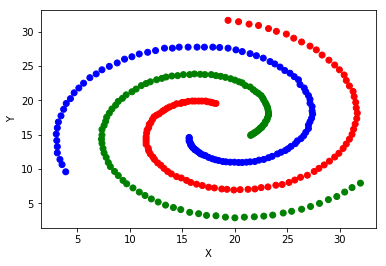

In [20]:
f.scatter_plot_data_set(data_points, data_labels,"figures/02-spiral_data")

In [21]:
# #create graph
# spiral_graph = f.create_weighted_Graph(W_spiral)
# #Plot graph
# f.plot_Graph(spiral_graph, nodes_position_spiral, 
#                title = '',node_size=5,edge_vmax=1e-8,alpha=0.2)

## Compute eigenvalues-eigenvectors

In [22]:
#Unnormalized graph Laplacian
eigenvalues_unnorm_s, eigenvectors_unnorm_s = la.eig(f.unnormalized_graph_Laplacian(W_spiral))
eigenvalues_unnorm_s = eigenvalues_unnorm_s.real
rearranged_unnorm_evals_spiral_data = f.rearrange_eigenvals(eigenvalues_unnorm_s, eigenvectors_unnorm_s)

#Symmetric graph Laplacian
eigenvalues_sym_s, eigenvectors_sym_s = la.eig(f.normalized_graph_Laplacian(W_spiral, matrix ="symmetric"))
eigenvalues_sym_s = eigenvalues_sym_s.real
rearranged_sym_evals_spiral_data = f.rearrange_eigenvals(eigenvalues_sym_s, eigenvectors_sym_s)

#Random Walk graph Laplacian   
eigenvalues_rw_s, eigenvectors_rw_s = la.eig(f.normalized_graph_Laplacian(W_spiral, matrix ="rw"))
eigenvalues_rw_s = eigenvalues_rw_s.real
rearranged_rw_evals_spiral_data = f.rearrange_eigenvals(eigenvalues_rw_s, eigenvectors_rw_s)

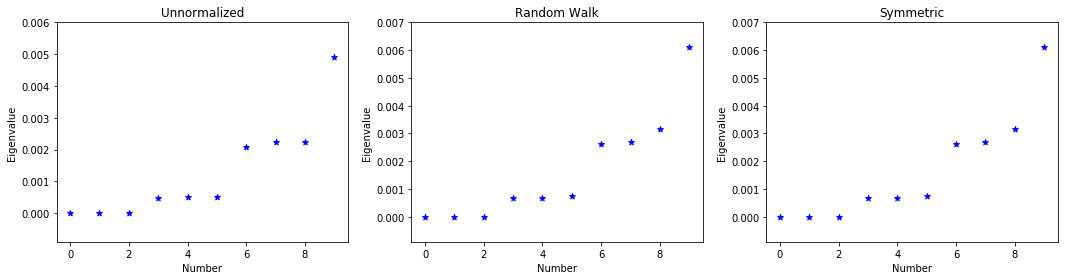

In [23]:
titles_list = ["Unnormalized","Random Walk","Symmetric"]
ylim_list =[(-0.0009,0.006),(-0.0009,0.007),(-0.0009,0.007)]
eigenvalues_sorted_lists_s = f.eigenvalues_list([rearranged_unnorm_evals_spiral_data,
                                               rearranged_rw_evals_spiral_data,
                                               rearranged_sym_evals_spiral_data])
f.plot_eigenvalues(eigenvalues_sorted_lists_s, titles_list,
                   ylim_list, "figures/21-eigenvalues_s",n=10)

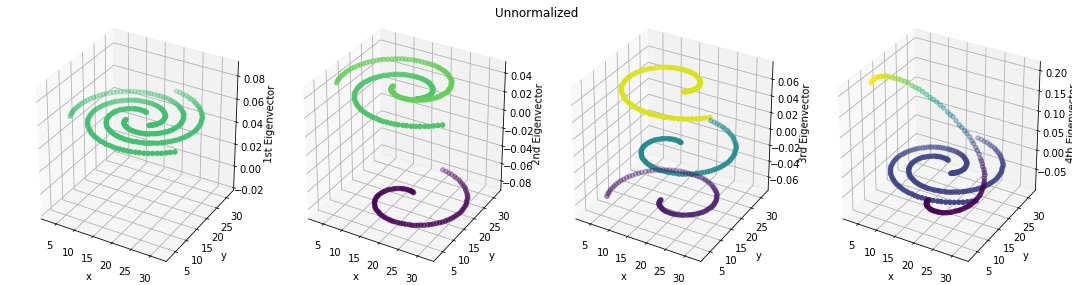

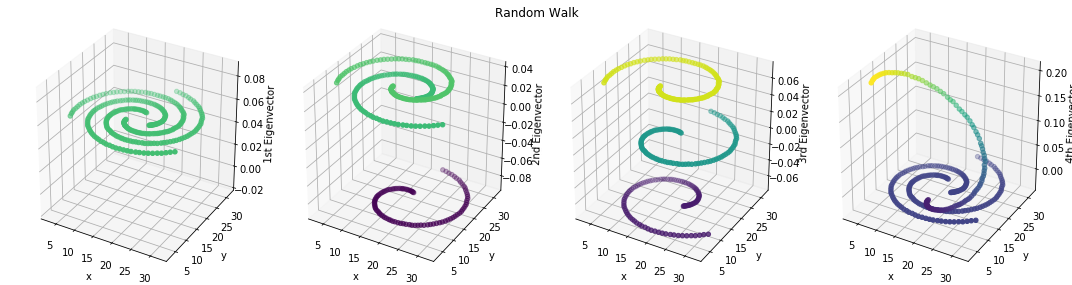

In [24]:
x, y = data_points.T
f.plot3D_eigenvectors(x,y,4,[rearranged_unnorm_evals_spiral_data,
                           rearranged_rw_evals_spiral_data] ,[[(-0.02, 0.09), (-0.08,0.08),
                                                               (-0.08,0.08),(-0.05,0.2)],
                                                              [(-0.02, 0.09),(-0.08,0.08),
                                                               (-0.08,0.08),(-0.05,0.2) ]],
                      "figures/21-3Deigenvecs_spiral")

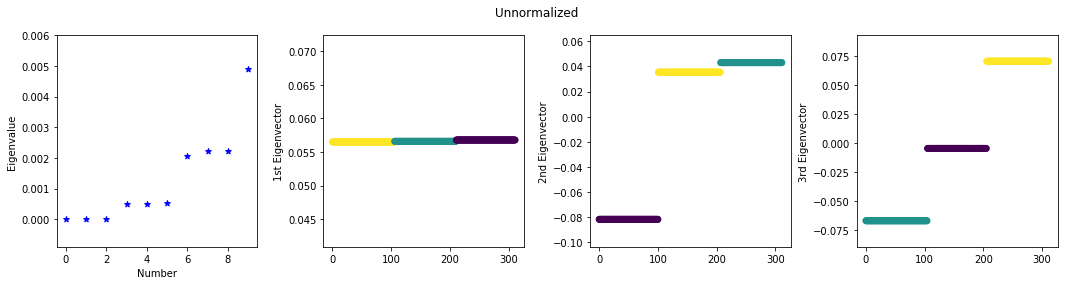

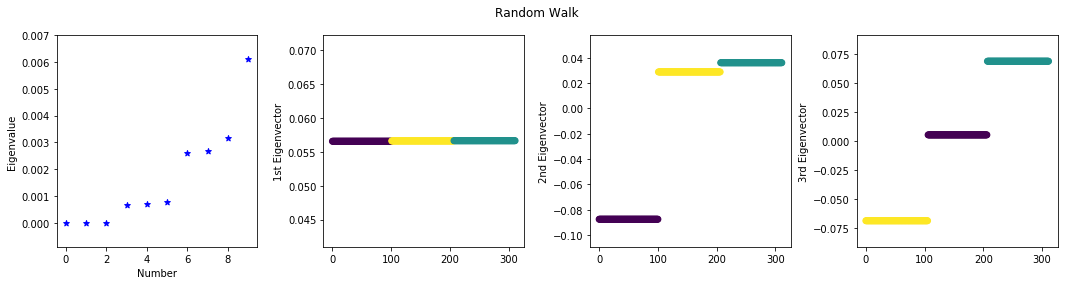

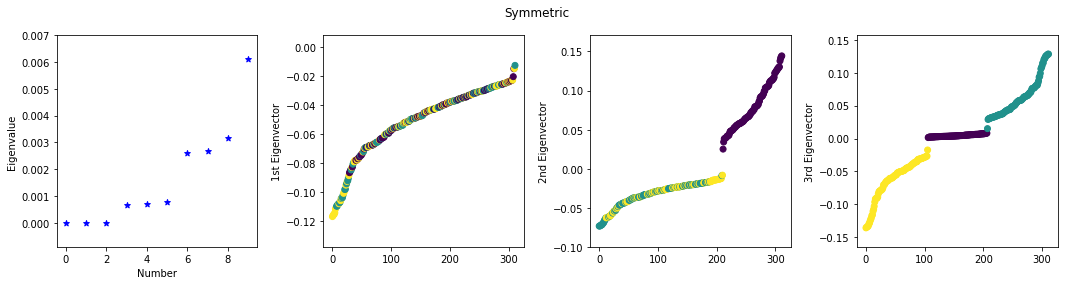

In [25]:
rearranged_list = [rearranged_unnorm_evals_spiral_data,
                   rearranged_rw_evals_spiral_data,
                   rearranged_sym_evals_spiral_data]
f.plot_eigenvects(rearranged_list, 3, data_labels,
                  [(-0.0009,0.006),(-0.0009,0.007),(-0.0009,0.007)],
                 "figures/22-eigenvecs_spiral")

### Multiplicity of the smallest eigenvalue

In [26]:
print(np.where(eigenvalues_unnorm_s < 1e-8)[0].shape[0])
print(np.where(eigenvalues_sym_s < 1e-8)[0].shape[0])
print(np.where(eigenvalues_rw_s < 1e-8)[0].shape[0])

3
3
3


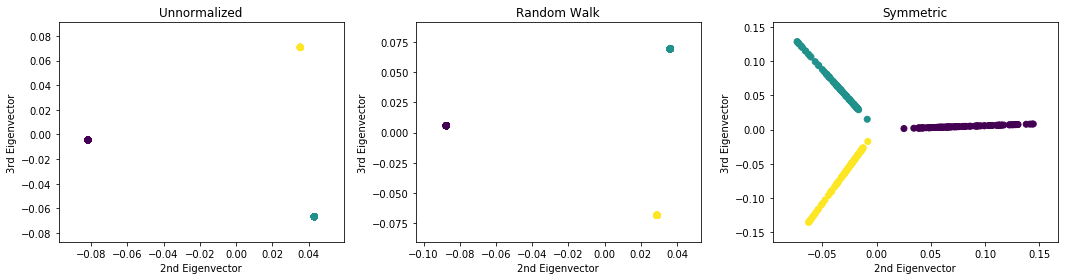

In [27]:
f. plot_eigenvectors_proj(rearranged_list, data_labels, titles_list, "figures/23-projection_spiral")

In [28]:
#K-means performance before the change of representation of the data:
k=3
kmeans_spiral_data_coord = KMeans(n_clusters=3,random_state=0).fit(data_points)

#K-means performance after performing spectral clustering:
s_unnormalized = f.spectral_clustering_algorithm(rearranged_unnorm_evals_spiral_data, k, which="unnormalized")
s_rw = f.spectral_clustering_algorithm(rearranged_rw_evals_spiral_data, k, which="normalized_rw")
s_sym = f.spectral_clustering_algorithm(rearranged_sym_evals_spiral_data, k, which="normalized_sym")

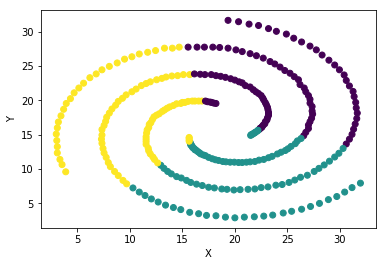

In [29]:
x, y = data_points.T
plt.scatter(x,y,c=kmeans_spiral_data_coord.labels_)
plt.xlabel("X")
plt.ylabel("Y")
plt.savefig("figures/24-kmeans_spiral_data")
plt.show()

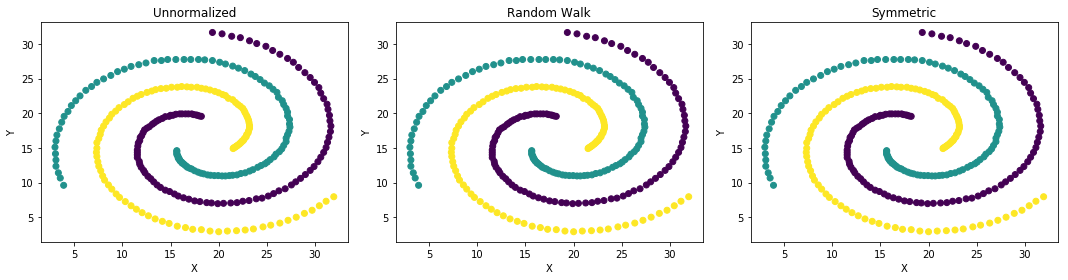

In [30]:
f.plot_kmeans_clustering(x,y,titles_list,[s_unnormalized, s_rw, s_sym],"figures/25-kmeans_spiral_data")

## 3- Circles data set

In [31]:
# Generate data set:
Npts_list = [400, 250, 70]
rad_list = [10, 6, 2]
lower_boundry_list=[0.7, 0.5, 0.3]
circle_data_points = f.generate_3circles_data_set(Npts_list, rad_list,lower_boundry_list, seed=1991)

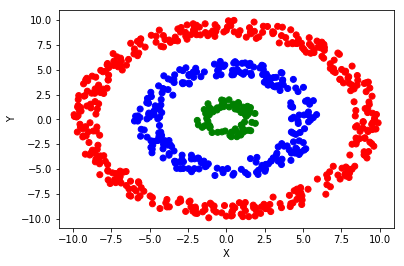

In [32]:
#Plot the data with original labels
f.scatter_plot_data_set(circle_data_points[:,0:2], circle_data_points[:,2], "figures/03-circle_data")

In [33]:
#Generate adjacency matrix:
W_circles = f.adjacency_matrix(circle_data_points[:,0:2], sigma=1)

#Unnormalized graph Laplacian
eigenvalues_unnorm_c, eigenvectors_unnorm_c = la.eig(f.unnormalized_graph_Laplacian(W_circles))
eigenvalues_unnorm_c = eigenvalues_unnorm_c.real
rearranged_unnorm_evals_circle_data = f.rearrange_eigenvals(eigenvalues_unnorm_c, eigenvectors_unnorm_c)

#Symmetric graph Laplacian
eigenvalues_sym_c, eigenvectors_sym_c = la.eig(f.normalized_graph_Laplacian(W_circles,"symmetric"))
eigenvalues_sym_c = eigenvalues_sym_c.real
rearranged_sym_evals_circle_data = f.rearrange_eigenvals(eigenvalues_sym_c, eigenvectors_sym_c)

##Random Walk graph Laplacian   
eigenvalues_rw_c, eigenvectors_rw_c = la.eig(f.normalized_graph_Laplacian(W_circles, "rw"))
eigenvalues_rw_c = eigenvalues_rw_c.real
rearranged_rw_evals_circle_data = f.rearrange_eigenvals(eigenvalues_rw_c, eigenvectors_rw_c)

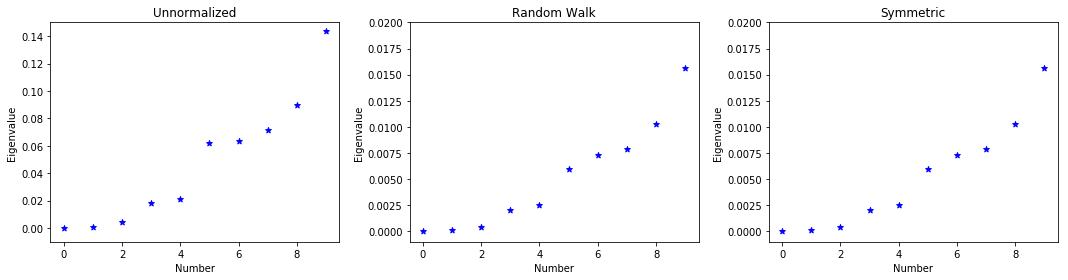

In [34]:
titles_list = ["Unnormalized","Random Walk","Symmetric"]
ylim_list = [(-0.01,0.15),(-0.001,0.02),(-0.001,0.02)]
eigenvalues_sorted_lists_c = f.eigenvalues_list([rearranged_unnorm_evals_circle_data,
                                                 rearranged_rw_evals_circle_data,
                                                 rearranged_sym_evals_circle_data])
f.plot_eigenvalues(eigenvalues_sorted_lists_c, titles_list,
                   ylim_list, "figures/31-eigenvalues_c",n=10)

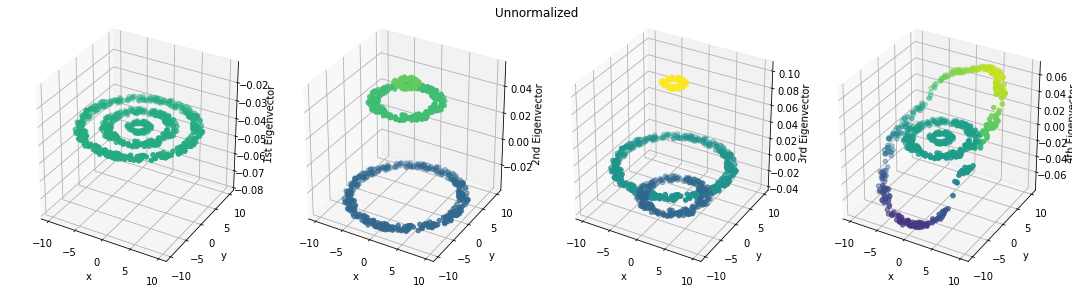

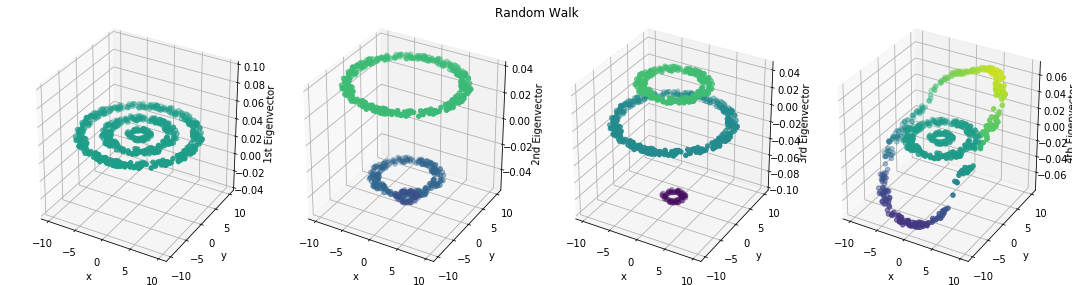

In [35]:
x, y,z = circle_data_points.T
f.plot3D_eigenvectors(x,y,4,[rearranged_unnorm_evals_circle_data,
                           rearranged_rw_evals_circle_data,] ,
                      [[(-0.08, -0.01), (-0.1, 0.1), (-0.1, 0.1), (-0.1, 0.08)],
                       [(-0.04, 0.1), (-0.1, 0.1),  (-0.1, 0.1), (-0.1, 0.08)]],
                     "figures/31-3Deigenvecs_circle")

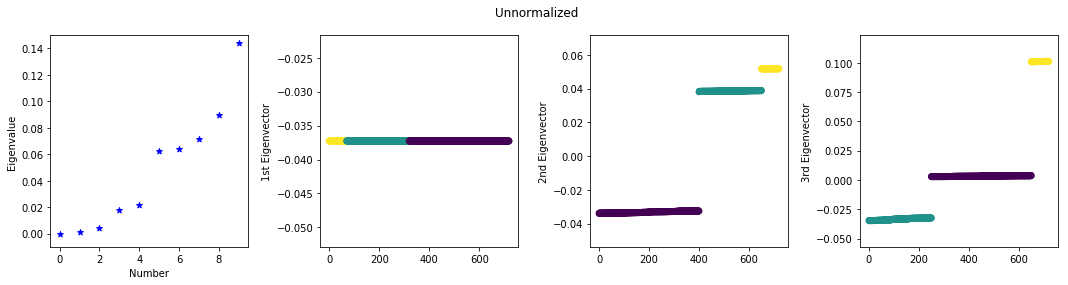

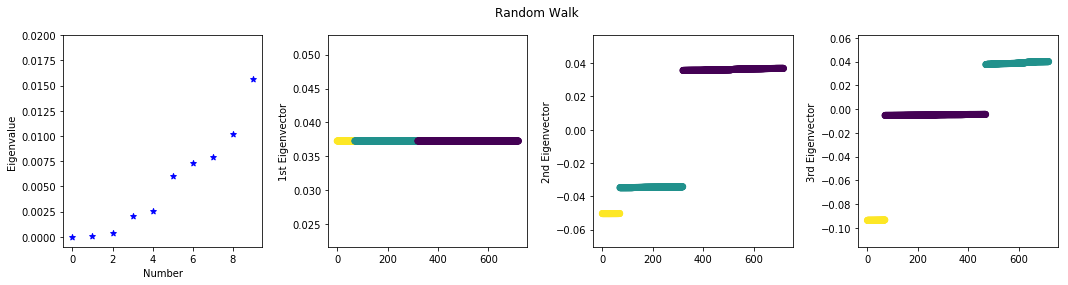

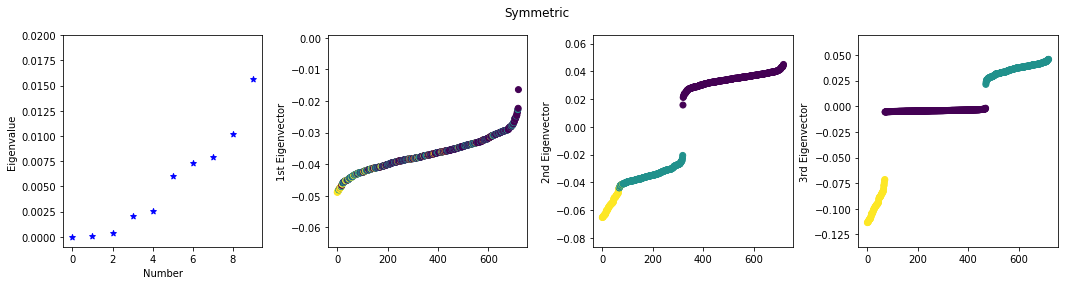

In [36]:
rearranged_list = [rearranged_unnorm_evals_circle_data,
                   rearranged_rw_evals_circle_data,
                   rearranged_sym_evals_circle_data]
f.plot_eigenvects(rearranged_list, 3, circle_data_points[:,2],
                  [(-0.01,0.15),(-0.001,0.02),(-0.001,0.02)],
                 "figures/32-eigenvecs_circle")

In [37]:
#Determine the number of clusters
multiplicity_k = np.where(eigenvalues_unnorm_c < 1e-2)[0].shape[0]
multiplicity_k

3

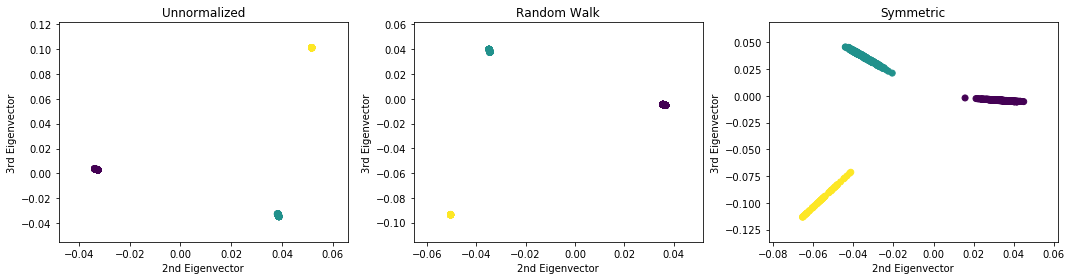

In [38]:
f. plot_eigenvectors_proj(rearranged_list, circle_data_points[:,2],
                          titles_list, "figures/33-sc_circle")

# The algorithm:

In [39]:
#K-means performance before the change of representation of the data:
k=3
kmeans_circle_data_coord = KMeans(n_clusters=k,random_state=0).fit(circle_data_points[:,0:2])

#K-means performance after performing spectral clustering:

cir_unnormalized = f.spectral_clustering_algorithm(rearranged_unnorm_evals_circle_data, k, which="unnormalized")
cir_rw = f.spectral_clustering_algorithm(rearranged_rw_evals_circle_data, k, which="normalized_rw")
cir_sym = f.spectral_clustering_algorithm(rearranged_sym_evals_circle_data, k, which="normalized_sym")

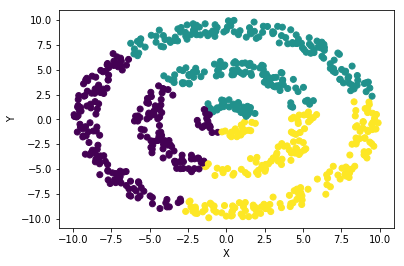

In [40]:
#Using K-means
x, y,z = circle_data_points.T

plt.tight_layout()
plt.scatter(x,y,c=kmeans_circle_data_coord.labels_)
plt.xlabel("X")
plt.ylabel("Y")
plt.savefig("figures/34-kmeans_circle_data")
plt.show()

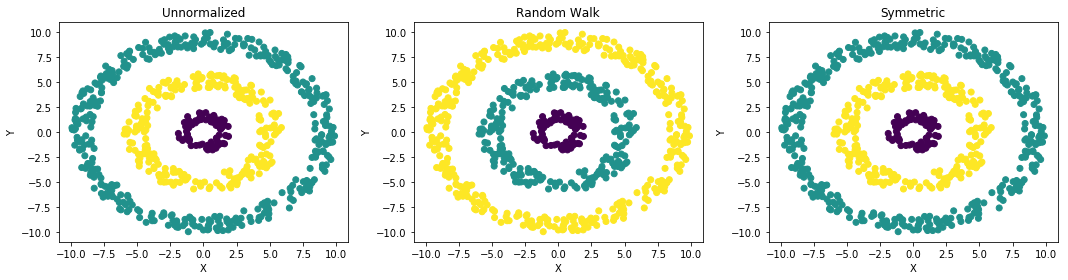

In [41]:
f.plot_kmeans_clustering(x,y,titles_list,[cir_unnormalized, cir_rw, cir_sym], "figures/35-kmeans_circle_data")

## Validation

## Pearson correlation coefficient with a *similarity matrix* defined by the Euclidean distance:

In [42]:
incidence_matrix = f.incidence_matrix(z)
similarity_matrix_eucledian_d = f.distance_matrix(circle_data_points[:,0:2], "eucledian_dist")

In [43]:
f.correlation_coefficient(incidence_matrix, similarity_matrix_eucledian_d)

0.09362574783855335

## Pearson correlation coefficient with a *similarity matrix* defined by the Euclidean Commute Time Distance:

In [44]:
# similarity_matrix_CTD = f.distance_matrix(dic_EvalsEvecs_circle_data,
#                                           "commute_time_distance", W_circles_dataset)
# f.correlation_coefficient(incidence_matrix, similarity_matrix_CTD)

## 4 - Imbalanced data set

In [45]:
#Create data points
Npts_imb = 60
Nclusters = 2
np.random.seed(7)
data_coordinates = np.random.normal(loc=0.0, scale=1.0, size=(Npts_imb, 2))

#Assign randomly each datapoint to a cluster
labels = np.random.choice(list(range(Nclusters)),size=Npts_imb,replace=True, p=[0.15,0.85])

#Assign each cluster a mean.
data_means = np.zeros((2,2))
data_means[0,] = [6,5]
data_means[1,] = [11,6]
#Shift the points towards the mean
clusterd_data =data_coordinates+data_means[labels,]

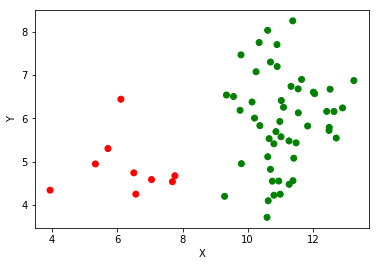

In [46]:
#Plot the data
f.scatter_plot_data_set(clusterd_data, labels, "figures/04-imb_data")

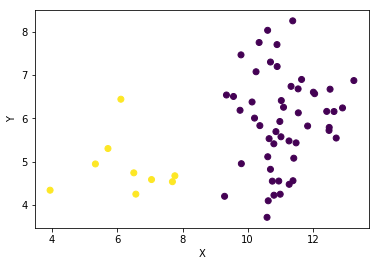

In [47]:
#K-means performance before the change of representation of the data:
kmeans_imbalanced_data = KMeans(n_clusters=2,random_state=0).fit(clusterd_data)

plt.scatter(clusterd_data[:,0],clusterd_data[:,1],c=kmeans_imbalanced_data.labels_)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


In [48]:
W_imb_data = f.adjacency_matrix(clusterd_data, sigma=2)

#Unnormalized graph Laplacian
eigenvalues_unnorm_i, eigenvectors_unnorm_i = la.eig(f.unnormalized_graph_Laplacian(W_imb_data))
eigenvalues_unnorm_i = eigenvalues_unnorm_i.real
rearranged_unnorm_evals_imb_data = f.rearrange_eigenvals(eigenvalues_unnorm_i, eigenvectors_unnorm_i)

#Symmetric graph Laplacian
eigenvalues_sym_i, eigenvectors_sym_i = la.eig(f.normalized_graph_Laplacian(W_imb_data, matrix ="symmetric"))
eigenvalues_sym_i = eigenvalues_sym_i.real
rearranged_sym_evals_imb_data = f.rearrange_eigenvals(eigenvalues_sym_i, eigenvectors_sym_i)

#Random Walk graph Laplacian   
eigenvalues_rw_i, eigenvectors_rw_i = la.eig(f.normalized_graph_Laplacian(W_imb_data, matrix ="rw"))
eigenvalues_rw_i = eigenvalues_rw_i.real
rearranged_rw_evals_imb_data = f.rearrange_eigenvals(eigenvalues_rw_i, eigenvectors_rw_i)


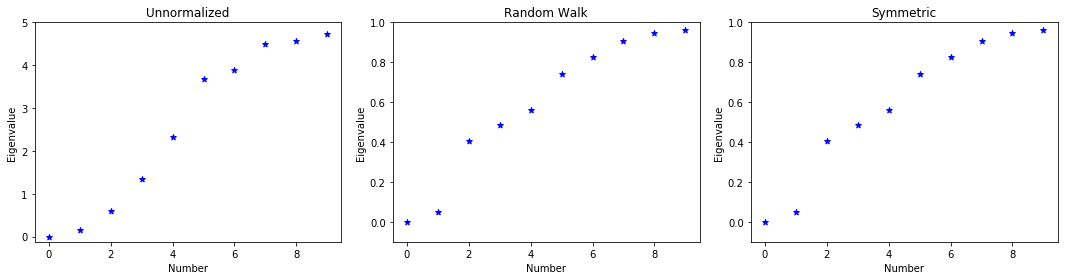

In [49]:
titles_list = ["Unnormalized","Random Walk","Symmetric"]
ylim_list = [(-0.12,5),(-0.1,1),(-0.1,1)]
eigenvalues_sorted_lists_um = f.eigenvalues_list([rearranged_unnorm_evals_imb_data,
                                                  rearranged_rw_evals_imb_data,
                                                  rearranged_sym_evals_imb_data])
f.plot_eigenvalues(eigenvalues_sorted_lists_um, titles_list,
                   ylim_list, "figures/41-eigenvalues_c",n=10)

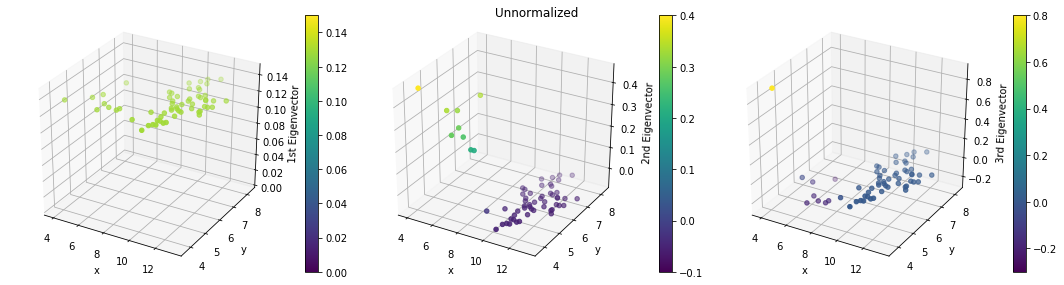

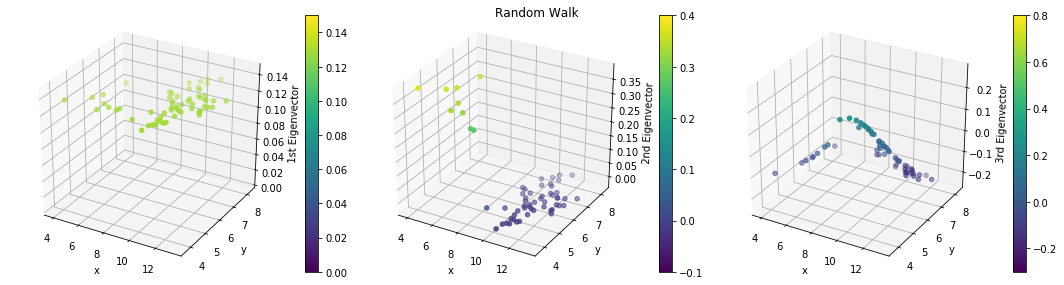

In [50]:
f.plot3D_eigenvectors(clusterd_data[:,0],clusterd_data[:,1],
                      3,[rearranged_unnorm_evals_imb_data,
                         rearranged_rw_evals_imb_data] ,[[(0, 0.15),(-0.1,0.4),(-0.3,0.8) ],
                                                         [(0, 0.15),(-0.1,0.4),(-0.3,0.8)]],
                     "figures/41-3Deigenvecs_imb")

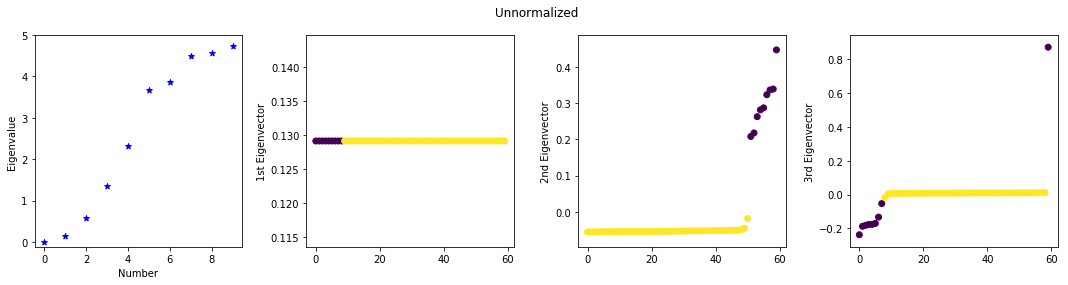

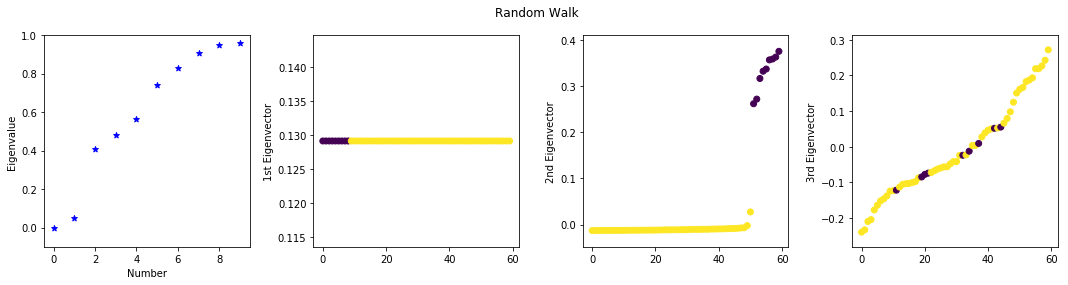

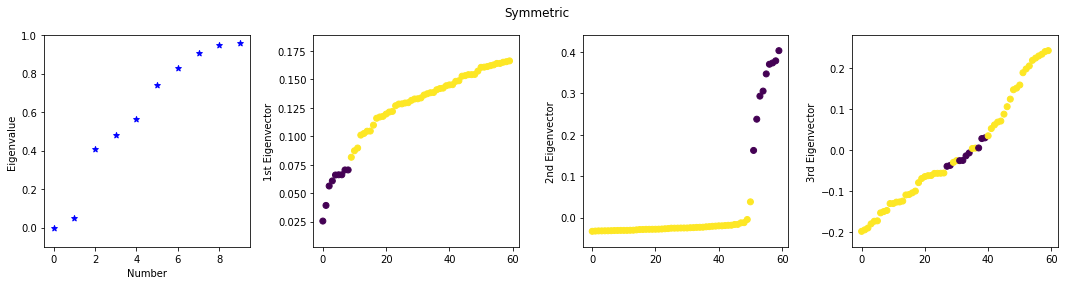

In [51]:
rearranged_list = [rearranged_unnorm_evals_imb_data,
                   rearranged_rw_evals_imb_data,
                   rearranged_sym_evals_imb_data]
f.plot_eigenvects(rearranged_list, 3, labels, 
                  [(-0.12,5),(-0.1,1),(-0.1,1)],
                 "figures/42-eigenvecs_imb")

## 5 - Detecting the number of clusters - hirarchical organizations in the data set

In [52]:
#Create data points
Npts_imb = 100
Nclusters = 4
np.random.seed(1991)
data_coordinates = np.random.normal(loc=0.0, scale=1.0, size=(Npts_imb, 2))

#Assign randomly each datapoint to a cluster
labels = np.random.choice(list(range(Nclusters)),size=Npts_imb,replace=True, p=[0.35,0.15,0.35,0.15])

#Assign each cluster a mean.
data_means = np.zeros((4,2))
data_means[0,] = [6.5,2.5]
data_means[1,] = [6.5,9.5]
data_means[2,] = [-5,2]
data_means[3,] = [-6,8.58]
#Shift the points towards the mean
clusterd_data =data_coordinates+data_means[labels,]

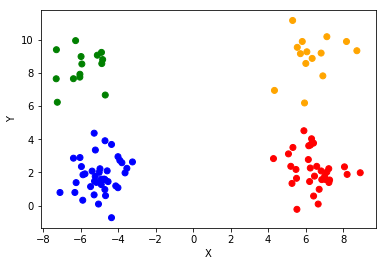

In [53]:
#Plot the data with original labels
f.scatter_plot_data_set(clusterd_data, labels, "figures/05-hirarchical_data")

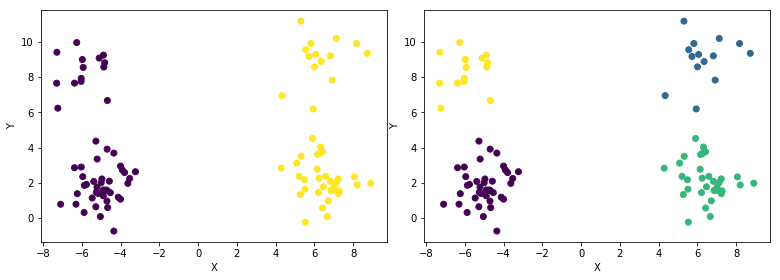

In [54]:
#K-means performance before the change of representation of the data:
kmeans_non_hirarchical = KMeans(n_clusters=2,random_state=0).fit(clusterd_data)
kmeans_hirarchical = KMeans(n_clusters=4,random_state=0).fit(clusterd_data)

fig = plt.figure(figsize=(11, 4))

#Plot data
plt.subplot(1, 2, 1)
plt.tight_layout()
plt.scatter(clusterd_data[:,0],clusterd_data[:,1],c=kmeans_non_hirarchical.labels_)
plt.xlabel("X")
plt.ylabel("Y")

#Plot sorted eigenvectors
plt.subplot(1, 2, 2)
plt.tight_layout()
plt.scatter(clusterd_data[:,0],clusterd_data[:,1],c=kmeans_hirarchical.labels_)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


In [55]:
W_h_data = f.adjacency_matrix(clusterd_data, sigma=10)

#Unnormalized graph Laplacian
eigenvalues_unnorm_h, eigenvectors_unnorm_h = la.eig(f.unnormalized_graph_Laplacian(W_h_data))
eigenvalues_unnorm_h = eigenvalues_unnorm_h.real
rearranged_unnorm_evals_h_data = f.rearrange_eigenvals(eigenvalues_unnorm_h, eigenvectors_unnorm_h)
#Symmetric graph Laplacian
eigenvalues_sym_h, eigenvectors_sym_h = la.eig(f.normalized_graph_Laplacian(W_h_data, matrix ="symmetric"))
eigenvalues_sym_h = eigenvalues_sym_h.real
rearranged_sym_evals_h_data = f.rearrange_eigenvals(eigenvalues_sym_h, eigenvectors_sym_h)
##Random Walk graph Laplacian   
eigenvalues_rw_h, eigenvectors_rw_h = la.eig(f.normalized_graph_Laplacian(W_h_data,matrix ="rw"))
eigenvalues_rw_h = eigenvalues_rw_h.real
rearranged_rw_evals_h_data = f.rearrange_eigenvals(eigenvalues_rw_h, eigenvectors_rw_h)


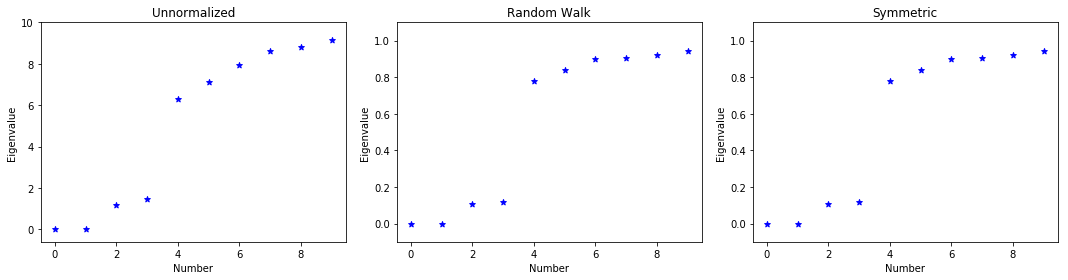

In [56]:
ylim_list =[(-0.6, 10), (-0.1, 1.1), (-0.1, 1.1)]
eigenvalues_list_h = f.eigenvalues_list([rearranged_unnorm_evals_h_data,
                                            rearranged_rw_evals_h_data,
                                            rearranged_sym_evals_h_data])
f.plot_eigenvalues(eigenvalues_list_h, titles_list, ylim_list, "figures/51-h_data_eigenspectrum", n=10)

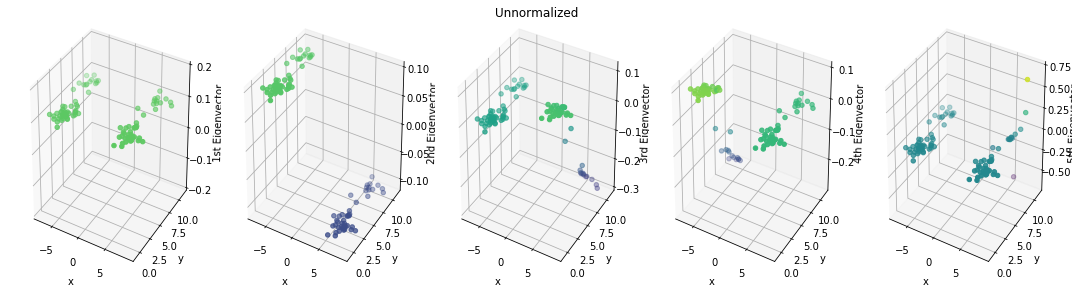

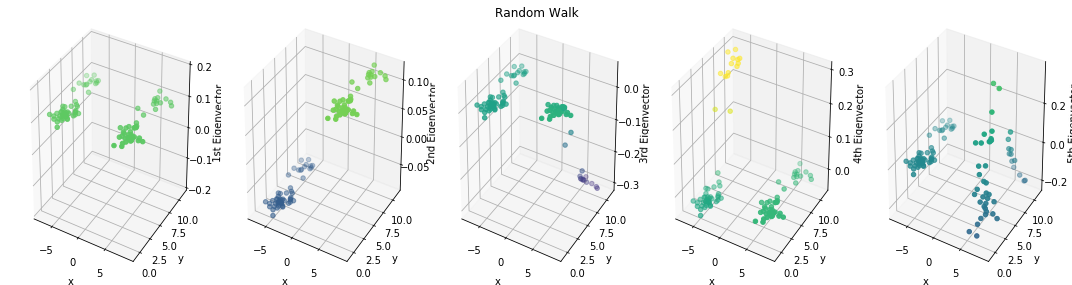

In [57]:
f.plot3D_eigenvectors(clusterd_data[:,0],clusterd_data[:,1],
                      5,[rearranged_unnorm_evals_h_data,
                         rearranged_rw_evals_h_data] ,[[(-0.2, 0.2),(-0.2,0.2),(-0.4,0.3),(-0.4,0.2),(-0.7,0.8)  ],
                                                         [(-0.2, 0.2),(-0.2,0.2),(-0.4,0.3),(-0.4,0.2),(-0.7,0.8) ]],
                     "figures/51-3Deigenvecs_h")

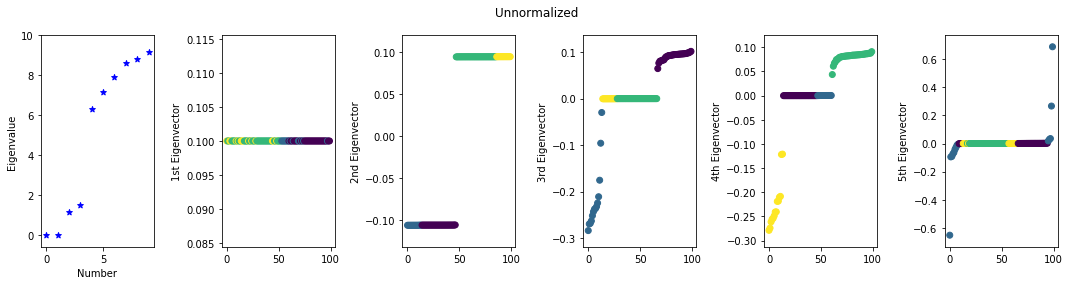

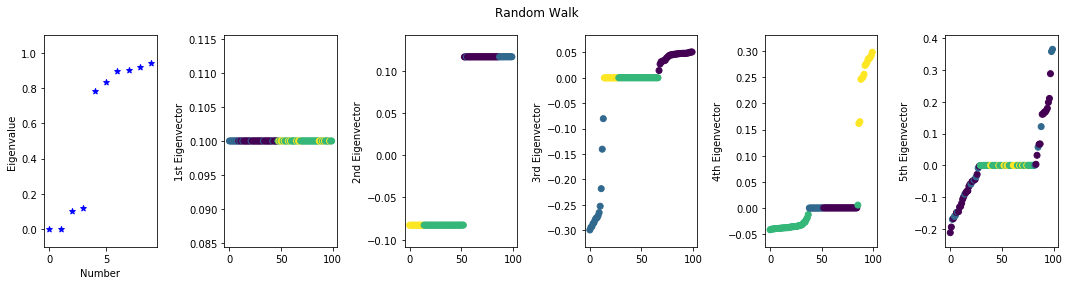

In [58]:
rearranged_list = [rearranged_unnorm_evals_h_data,
                   rearranged_rw_evals_h_data]
f.plot_eigenvects(rearranged_list, 5, labels, [(-0.6, 10), (-0.1, 1.1)], "figures/52-eigenvecs_h")

# 6 - Mixture of Gaussians

In [59]:
data_points = f.generate_gaussian_mixture(Npts=200,
                                        pvals=[0.35, 0.2, 0.25, 0.2],
                                        mu=[2, 4, 6, 8],
                                        std= [0.3,0.30,0.30,0.30],
                                        NumbMixures= 4, seed=1234)

In [60]:
data = [item for sublist in list(data_points.values()) for item in sublist]

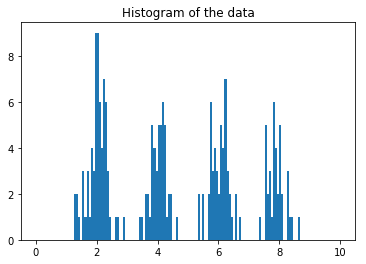

In [61]:
plt.hist(data, range=(0,10), bins=150)
plt.title("Histogram of the data")
plt.savefig("figures/06-histogram_gaussian")
plt.savefig("figures/mixture_of_gaussians_histogram") 
plt.show()

In [62]:
W_gaussian = f.adjacency_matrix(np.matrix(data).reshape(-1, 1), sigma=1)

#Unnormalized graph Laplacian
eigenvalues_unnorm_gm, eigenvectors_unnorm_gm = la.eig(f.unnormalized_graph_Laplacian(W_gaussian))
eigenvalues_unnorm_gm = eigenvalues_unnorm_gm.real
rearranged_unnorm_evals_gm = f.rearrange_eigenvals(eigenvalues_unnorm_gm, eigenvectors_unnorm_gm)
#Symmetric graph Laplacian
eigenvalues_sym_gm, eigenvectors_sym_gm = la.eig(f.normalized_graph_Laplacian(W_gaussian,matrix ="symmetric"))
eigenvalues_sym_gm = eigenvalues_sym_gm.real
rearranged_sym_evals_gm = f.rearrange_eigenvals(eigenvalues_sym_gm, eigenvectors_sym_gm)
##Random Walk graph Laplacian   
eigenvalues_rw_gm, eigenvectors_rw_gm = la.eig(f.normalized_graph_Laplacian(W_gaussian,matrix ="rw"))
eigenvalues_rw_gm = eigenvalues_rw_gm.real
rearranged_rw_evals_gm = f.rearrange_eigenvals(eigenvalues_rw_gm, eigenvectors_rw_gm)


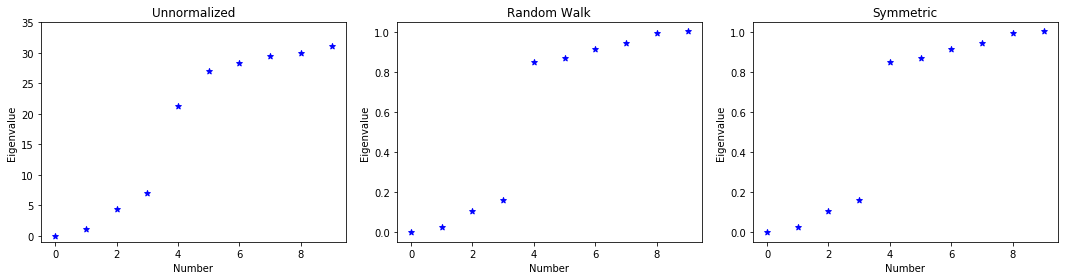

In [63]:
titles_list = ["Unnormalized","Random Walk","Symmetric"]
ylim_list =[(-1, 35), (-0.05, 1.05), (-0.05, 1.05)]
eigenvalues_list_gm = f.eigenvalues_list([rearranged_unnorm_evals_gm,rearranged_rw_evals_gm,
                                          rearranged_sym_evals_gm])
f.plot_eigenvalues(eigenvalues_list_gm, titles_list, ylim_list, "figures/61-eigenvalues_gm_data", n=10)

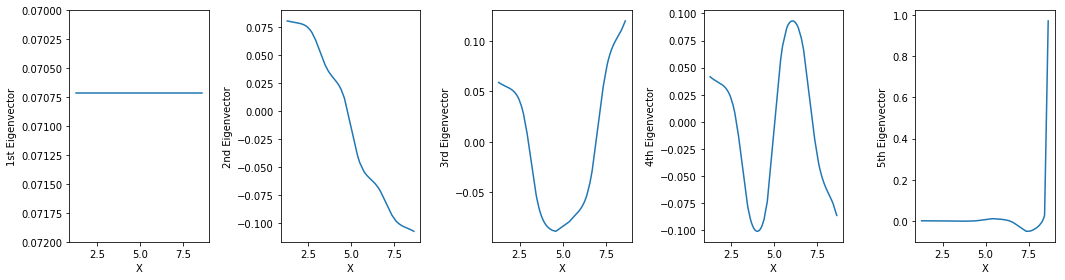

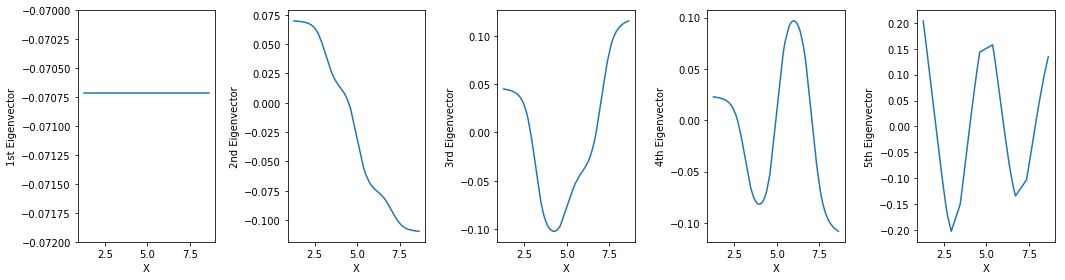

In [64]:
f.plot1D_eigenvects(data, [rearranged_unnorm_evals_gm,
                         rearranged_rw_evals_gm],
                  [(0.072, 0.07), (-0.072,-0.07)],5,"figures/62-eigenvecs_gm_data")